In [2]:
# Import necessary libraries for text data preprocessing
import os
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk.corpus import stopwords

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

extra_words = ['not','until','against','up', 'down', 'no', 'nor',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
                                                "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
                                                 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "don't"]

stop_words = [word for word in stopwords if word not in extra_words]

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


TypeError: 'WordListCorpusReader' object is not iterable

In [5]:
print(stop_words)

{'not', 'about', 'does', 'up', 'her', 'their', "isn't", 'but', 'yours', 'for', 'was', 'below', 'what', "mustn't", 'an', 'only', 'from', 'and', "shouldn't", 'very', 'wasn', 'we', 'because', "i'm", 'these', 'if', 'own', 'have', 'over', 'doesn', "should've", 'hers', 'my', 'i', "it'll", "you're", 'at', 'down', 't', 'to', 'do', 'when', 'between', "didn't", 'than', 'yourself', 'herself', 'don', 'after', "he'll", 'hadn', 'by', 'mightn', "she'll", 'm', "they've", 'he', 'theirs', 'now', 'few', 'mustn', "that'll", 'has', "hadn't", "we've", 'ours', 'above', 'again', 'some', "they'd", 'your', "don't", "she's", 'into', 'y', "they're", 'am', 'this', 'no', 'ain', 'be', "i'd", 'him', 'isn', "it's", 'on', 'here', "we're", 'needn', 'hasn', 'ma', "i'll", 'until', 've', 'whom', 'while', 'are', 'those', 'with', 'd', 'me', 'out', 'itself', 'so', 'during', 'which', 'just', 'other', 'any', "you'd", 'weren', 'same', 'wouldn', 'were', 'won', 're', "aren't", 'couldn', 'ourselves', "he's", "you'll", 'too', "doesn

**Loading the dataset**

In [6]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding="latin", header=None, on_bad_lines='skip')

# renaming columns
df.rename(columns={0:'labels', 5:'tweets'}, inplace=True)

# Dropping unnecessary columns 
df.drop([1,2,3,4], axis=1, inplace=True)

df['labels'] = df['labels'].replace(4,1)

# Randomly shuffling the DataFrame and selecting a subset of 10,000 rows
df = df.sample(frac=1)
df = df.head(10000)

df.head()

,labels,tweets
205879,0,@duhale it died a few weeks ago!!
1420622,1,gettin as ready as i can to go to work
389144,0,"i am sick of being poorly now, it''s been a m..."
41547,0,@vodkaavenger u don't like IP anymore?
1194346,1,"Gonna watch Up. Still have a headache, and it'..."


In [7]:
def get_word_len(tweet):
    return len(tweet.split(' '))

def get_char_len(tweet):
    return len(tweet)

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    # remove urls from the tweet
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove mentions (e.g., @username) from the tweet
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove special characters and punctuation from the tweet
    tweet = re.sub(r'[^\w\s#]', '', tweet)
    
    # Lemmatize the words using spaCy
    tokens = [token.lemma_ for token in nlp(tweet)]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove single-character tokens
    tokens = [token for token in tokens if len(token) > 1]
    
    # Join the processed tokens to form the cleaned tweet
    processed_tweet = ' '.join(tokens)
    
    return processed_tweet

df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'], position=0, leave=True)]

df['tweets_words_length'] = df['clean_tweets'].apply(get_word_len)

df['tweets_char_length'] = df['clean_tweets'].apply(get_char_len)

df.head()

100%|██████████| 10000/10000 [01:12<00:00, 138.62it/s]


,labels,tweets,clean_tweets,tweets_words_length,tweets_char_length
205879,0,@duhale it died a few weeks ago!!,die week ago,3,12
1420622,1,gettin as ready as i can to go to work,gettin ready go work,4,20
389144,0,"i am sick of being poorly now, it''s been a m...",sick poorly month stomach problem feed,6,38
41547,0,@vodkaavenger u don't like IP anymore?,like ip anymore,6,18
1194346,1,"Gonna watch Up. Still have a headache, and it'...",go watch still headache stuffy damn kid yay,8,43


In [8]:
df.shape

(10000, 5)

In [9]:
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [10]:
# number of positive sentiment tweets
positive_count = len(df[df['labels']==1])
negative_count = len(df[df['labels']==0])
# print(f"Negative sentiment tweets = {len(df[df['labels']==0])}")
# print(f"Positive sentiment tweets = {len(df[df['labels']==1])}")

fig = px.pie(values = [positive_count,negative_count], title = "Distribution of positive and negative tweets", 
        names = ['Positive', 'Negative'], hover_name = ['Positive', 'Negative'], opacity=.9, template='simple_white')

fig.show()

In [11]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Positive')

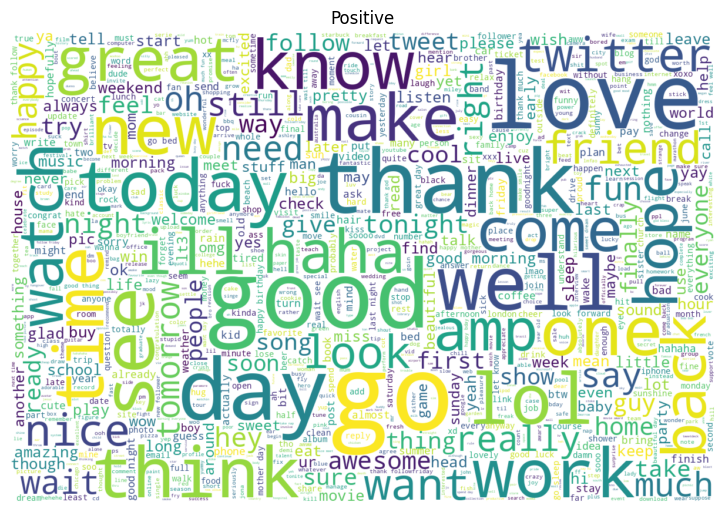

In [12]:
# for positive sentiment tweets

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

wordcloud_1 = WordCloud(width=1200, height=800, max_words=1000, contour_width=2, background_color='white', max_font_size=180, 
                        colormap='viridis').generate(' '.join(df[df['labels']==1]['clean_tweets'])) 

plt.imshow(wordcloud_1, interpolation = 'bilinear')
plt.axis('off')
plt.title("Positive")

Text(0.5, 1.0, 'Negative')

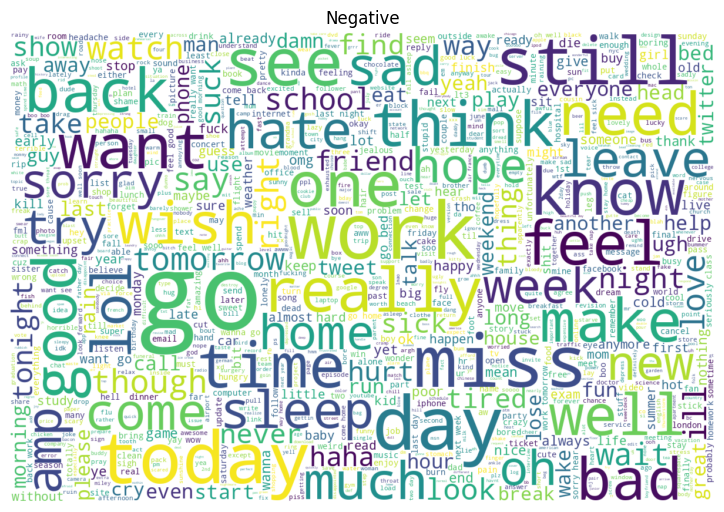

In [13]:
# for negative sentiment tweets 
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

wordcloud_1 = WordCloud(width=1200, height=800, max_words=1000, contour_width=2, background_color='white', max_font_size=180, 
                        colormap='viridis').generate(' '.join(df[df['labels']==0]['clean_tweets'])) 

plt.imshow(wordcloud_1, interpolation = 'bilinear')
plt.axis('off')
plt.title("Negative")

In [14]:
# Create distribution plots for word count and character count for positive and negative tweets
fig_words = ff.create_distplot(
    [df[df['labels'] == 1]['tweets_words_length'], df[df['labels'] == 0]['tweets_words_length']],
    ['Positive', 'Negative'],
    bin_size=25,
    show_hist=False,
    show_rug=False
)

fig_chars = ff.create_distplot(
    [df[df['labels'] == 1]['tweets_char_length'], df[df['labels'] == 0]['tweets_char_length']],
    ['Positive', 'Negative'],
    bin_size=25,
    show_hist=False,
    show_rug=False
)

# Set titles and labels for the distribution plots
fig_chars.update_layout(title="Distribution Plot on Character Count", xaxis_title="Number of Characters", yaxis_title="Frequency")
fig_words.update_layout(title="Distribution Plot on Word Count", xaxis_title="Number of Words", yaxis_title="Frequency")

# Combine the plots in a 2-column layout
fig = make_subplots(rows=1, cols=2, subplot_titles=["Word Count", "Character Count"])
fig.add_trace(fig_words['data'][0], row=1, col=1)
fig.add_trace(fig_words['data'][1], row=1, col=1)
fig.add_trace(fig_chars['data'][0], row=1, col=2)
fig.add_trace(fig_chars['data'][1], row=1, col=2)

# Update overall layout and show the plot
fig.update_layout(title_text="Distribution Plots - Word Count vs Character Count", showlegend=True, font=dict(family="Arial", size=15, color="black"))
fig.show()

## Splitting the dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df['clean_tweets'], df['labels'], test_size=.2, random_state=42)

# further split the set into validation and testing set 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)

# Creating a pie chart to visualize the distribution of tweet counts in training, testing, and validation sets
fig = px.pie(values=[len(x_train), len(x_test), len(x_val)], title='Distribution of Training, Testing, and Validation Tweets', 
             names=['Training', 'Testing', 'Validation'], hover_name=['Training', 'Testing', 'Validation'], opacity=0.9, template='simple_white')

# Displaying the pie chart
fig.show()

## Building first NEURAL NETWORK

In [17]:
df.head()

,labels,tweets,clean_tweets,tweets_words_length,tweets_char_length
205879,0,@duhale it died a few weeks ago!!,die week ago,3,12
1420622,1,gettin as ready as i can to go to work,gettin ready go work,4,20
389144,0,"i am sick of being poorly now, it''s been a m...",sick poorly month stomach problem feed,6,38
41547,0,@vodkaavenger u don't like IP anymore?,like ip anymore,6,18
1194346,1,"Gonna watch Up. Still have a headache, and it'...",go watch still headache stuffy damn kid yay,8,43


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [19]:
# Sequential is used to build the model step-by-step by adding layers one after another.​
from tensorflow.keras.models import Sequential

# Dense layers introduce trainable weights between nodes.
# Dropout layers prevent overfitting by randomly disabling some nodes during training
from tensorflow.keras.layers import Dropout, Dense


### Neural Network | One hot encoding

In [20]:
# converting clean_tweets to ONE HOT ENCODING
vec = CountVectorizer(binary=True)
vec.fit(df['clean_tweets'])

enc_tweets = vec.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)

In [21]:
print(f'Validation set details :-\n No. of rows:{x_val.shape[0]} \n No. of columns:{x_val.shape[1]}')

Validation set details :-
 No. of rows:1000 
 No. of columns:12871


In [22]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

2025-10-26 10:15:27.586107: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.5838 - loss: 0.6647 - val_accuracy: 0.7120 - val_loss: 0.5778
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.8115 - loss: 0.4478 - val_accuracy: 0.7130 - val_loss: 0.5814


In [23]:
evaluations = model.evaluate(x_test, y_test)
print(f'loss = {evaluations[0]}')
print(f'accuracy = {evaluations[1]}')

# before using dropout, evaluation values
# [0.6890667080879211, 0.7080000042915344]

# after using dropout - 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6870 - loss: 0.6379
loss = 0.6353585124015808
accuracy = 0.6899999976158142


### Neural Network | Count Vectorizer

In [24]:
# converting clean_tweets to Count Vectorizer
vec = CountVectorizer(binary=False)
vec.fit(df['clean_tweets'])

enc_tweets = vec.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)


model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_2 = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.5743 - loss: 0.6667 - val_accuracy: 0.7010 - val_loss: 0.5678
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8079 - loss: 0.4653 - val_accuracy: 0.7100 - val_loss: 0.5877


In [25]:
evaluations = model.evaluate(x_test, y_test)
print(f'loss = {evaluations[0]}')
print(f'accuracy = {evaluations[1]}')

# before using dropout, evaluation values
# [0.6890667080879211, 0.7080000042915344]

# after using dropout - 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6856 - loss: 0.6302
loss = 0.6150409579277039
accuracy = 0.6919999718666077


### Neural Network | TF-IDF

In [26]:
# converting clean_tweets to Count Vectorizer
tfidf = TfidfVectorizer()

enc_tweets = tfidf.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)


model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_3 = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.5680 - loss: 0.6730 - val_accuracy: 0.7040 - val_loss: 0.5789
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8129 - loss: 0.4359 - val_accuracy: 0.6940 - val_loss: 0.6046


In [27]:
evaluations = model.evaluate(x_test, y_test)
print(f'loss = {evaluations[0]}')
print(f'accuracy = {evaluations[1]}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7203 - loss: 0.5749
loss = 0.593950629234314
accuracy = 0.699999988079071


In [28]:
one_hot_encoding = history_1.history
count_vectorization = history_2.history
tf_idf = history_3.history
print(f"ONE HOT Encoding: \n Accuracy:{one_hot_encoding['accuracy'][1]} Loss:{one_hot_encoding['loss']}\n")
print(f"Count Vectorization: \n Accuracy:{count_vectorization['accuracy'][1]} Loss:{count_vectorization['loss']}\n")
print(f"TF IDF: \n Accuracy:{tf_idf['accuracy'][1]} Loss:{tf_idf['loss']}\n")
# history_2.history


ONE HOT Encoding: 
 Accuracy:0.8059999942779541 Loss:[0.6280118823051453, 0.4513503909111023]

Count Vectorization: 
 Accuracy:0.8028749823570251 Loss:[0.6315738558769226, 0.4667429029941559]

TF IDF: 
 Accuracy:0.8062499761581421 Loss:[0.6379784941673279, 0.44709184765815735]



In [29]:
history_2.history

{'accuracy': [0.6372500061988831, 0.8028749823570251],
 'loss': [0.6315738558769226, 0.4667429029941559],
 'val_accuracy': [0.7009999752044678, 0.7099999785423279],
 'val_loss': [0.567754328250885, 0.5876657962799072]}

## Embedding layer + Neural network 

In [30]:
df['clean_tweets']

205879                                          die week ago
1420622                                 gettin ready go work
389144                sick poorly month stomach problem feed
41547                                        like ip anymore
1194346          go watch still headache stuffy damn kid yay
                                 ...                        
1451818      yeah think atlanta may capitol city neattorific
763939        miss tweet    turn couple day ago catch big...
80178                              aw remember part make sad
1553209    oh wooyoung khun lt3 want want want seulong ge...
62451                                             oh oh mean
Name: clean_tweets, Length: 10000, dtype: object

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_tweets'])

# Creating word index and index word mappings for reference
word_index = tokenizer.word_index

In [36]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.optimizers import Adam 

model = Sequential()

model.add(Embedding(input_dim=len(word_index)+1, output_dim= 10))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))


# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=.0001), metrics=['accuracy'])

history_5 = model.fit(x_train, y_train, epochs=5, batch_size=502, validation_data=(x_val, y_val))


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 848ms/step - accuracy: 0.4980 - loss: 8.0906 - val_accuracy: 0.5010 - val_loss: 8.0429
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 828ms/step - accuracy: 0.4981 - loss: 8.0904 - val_accuracy: 0.5010 - val_loss: 8.0429
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 822ms/step - accuracy: 0.5062 - loss: 7.9583 - val_accuracy: 0.5010 - val_loss: 8.0429
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 832ms/step - accuracy: 0.5038 - loss: 7.9985 - val_accuracy: 0.5010 - val_loss: 8.0429
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 812ms/step - accuracy: 0.4939 - loss: 8.1568 - val_accuracy: 0.5010 - val_loss: 8.0429
